In [2]:
import pandas as pd

In [3]:
test2 = pd.read_csv("test2.csv")
print(test2.head())
print(test2.dtypes)

                                        Ten_kh     Tk   Tk_du Ps_no  \
0                    C?ng ty TNHH FCC Vi?t Nam  51111  131114     0   
1  C?ng ty TNHH Nidec Sankyo Vi?t Nam (H? N?i)  51122  131114     0   
2           C?ng ty TNHH Yamaha Motor Vi?t Nam  51111  131114     0   
3           C?ng ty TNHH Yamaha Motor Vi?t Nam  51111  131114     0   
4                            Ihara MFG Co,.LTD  51122  131111     0   

            Ps_co  
0   99,717,420.00  
1  154,713,600.00  
2   25,364,200.00  
3  201,781,350.00  
4      190,341.00  
Ten_kh    object
Tk         int64
Tk_du      int64
Ps_no     object
Ps_co     object
dtype: object


In [3]:
#cleaning data: bỏ dấu phẩy ở cột Ps_co
test2 = test2.replace('.00','', regex=True)
print(test2.head())

                                        Ten_kh     Tk   Tk_du Ps_no      Ps_co
0                    C?ng ty TNHH FCC Vi?t Nam  51111  131114     0   99717420
1  C?ng ty TNHH Nidec Sankyo Vi?t Nam (H? N?i)  51122  131114     0  154713600
2           C?ng ty TNHH Yamaha Motor Vi?t Nam  51111  131114     0   25364200
3           C?ng ty TNHH Yamaha Motor Vi?t Nam  51111  131114     0  201781350
4                             Ihara MFG Co.LTD  51122  131111     0     190341


In [4]:
#cleaning data: chuyển kiểu dữ liệu từ object sang int
test2["Ps_co"] = test2["Ps_co"].astype(int)
print(test2.dtypes)

Ten_kh    object
Tk         int64
Tk_du      int64
Ps_no     object
Ps_co      int32
dtype: object


In [5]:
#sort cột Ps_co theo thứ tự tăng dần
test2_revenue = test2.sort_values("Ps_co")
print(test2_revenue.head())

    Ten_kh      Tk  Tk_du         Ps_no  Ps_co
337    NaN  511121    911    7682685.00      0
276    NaN   51111  51111             0      0
277    NaN   51122    911   14478141.00      0
127    NaN  511121    911    2987856.00      0
126    NaN   51121    911  231241670.00      0


In [7]:
#cleaining data: kiểm tra lại xem có cột nào chứa NaN
import matplotlib.pyplot as plt
print(test2.isna().any())


Ten_kh     True
Tk        False
Tk_du     False
Ps_no     False
Ps_co     False
dtype: bool


In [8]:
test2_sale = test2.groupby("Ten_kh")["Ps_co"].agg(sum)
print(test2_sale)

Ten_kh
C?ng ty C? ph?n M?i tr??ng Thu?n Th?nh         2.215045e+08
C?ng ty TNHH FCC Vi?t Nam                      3.609778e+09
C?ng ty TNHH Nidec Sankyo Vi?t Nam (H? N?i)    5.707872e+08
C?ng ty TNHH Yamaha Motor Vi?t Nam             2.095061e+10
Ihara MFG Co.LTD                               2.667078e+07
Ihara manufacturing (Thailand) Co. Ltd         2.287721e+09
PT IHARA MANUFACTURING INDONESIA               4.376460e+09
Name: Ps_co, dtype: float64


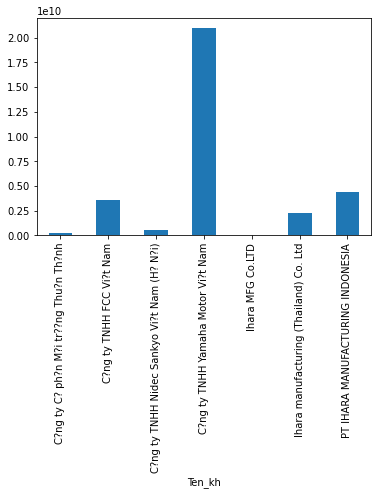

In [11]:
#tạo biểu đồ xem bán cho ai nhiều nhất
test2_sale.plot(kind = "bar")
plt.show()